In [1]:
import pandas as pd
import numpy as np

In [2]:
eqtl_apoe = pd.read_csv('/projects/ps-renlab2/sux002/DSC180/local_testing/result/eQTL_APOE_result.csv', sep='\t')

In [3]:
eqtl_apoe

,SNP,Beta,P-value,position,-log10(P-value)
0,rs7256902,0.072476,0.721231,39907575,0.141925
1,rs10422645,-0.051406,0.460274,39911014,0.336984
2,rs12459958,-0.053986,0.448770,39913651,0.347976
3,rs12460562,-0.066221,0.355502,39914180,0.449158
4,rs10401972,-0.045093,0.467104,39917174,0.330586
...,...,...,...,...,...
1397,rs769451,0.033185,0.920789,44907654,0.035840
1398,rs439401,0.037967,0.550995,44911194,0.258852
1399,rs445925,0.155474,0.090532,44912383,1.043198
1400,rs584007,0.043748,0.493925,44913221,0.306339


In [4]:
apoe_prediction = pd.read_csv('/projects/ps-renlab2/sux002/DSC180/local_testing/result/chr19_numer_1402_result.csv', sep='\t')
apoe_tracks_prediction = pd.read_csv('/projects/ps-renlab2/sux002/DSC180/local_testing/result/chr19_numer_1402_tracks_result.csv', sep='\t')

## Take the absolute value of the prediction result

In [5]:
apoe_prediction['abs_result'] = abs(apoe_prediction['Result'])
apoe_tracks_prediction['abs_result'] = abs(apoe_tracks_prediction['Result'])

In [6]:
apoe_prediction

,Chrom,SNP,Position,Start,End,Allele1,Allele2,Result,abs_result
0,19,rs7256902,39907575,39809271,40005879,A,C,-0.190758,0.190758
1,19,rs10422645,39911014,39812710,40009318,G,A,0.281975,0.281975
2,19,rs12459958,39913651,39815347,40011955,G,A,-0.059242,0.059242
3,19,rs12460562,39914180,39815876,40012484,A,G,0.347733,0.347733
4,19,rs10401972,39917174,39818870,40015478,C,A,0.716255,0.716255
...,...,...,...,...,...,...,...,...,...
1397,19,rs769451,44907654,44809350,45005958,G,T,0.481247,0.481247
1398,19,rs439401,44911194,44812890,45009498,C,T,0.361999,0.361999
1399,19,rs445925,44912383,44814079,45010687,A,G,-0.035110,0.035110
1400,19,rs584007,44913221,44814917,45011525,G,A,-0.047607,0.047607


In [7]:
apoe_tracks_prediction

,Chrom,SNP,Position,Start,End,Allele1,Allele2,Result,abs_result
0,19,rs7256902,39907575,39809271,40005879,A,C,-0.335007,0.335007
1,19,rs10422645,39911014,39812710,40009318,G,A,1.057831,1.057831
2,19,rs12459958,39913651,39815347,40011955,G,A,-0.140381,0.140381
3,19,rs12460562,39914180,39815876,40012484,A,G,0.521454,0.521454
4,19,rs10401972,39917174,39818870,40015478,C,A,0.552917,0.552917
...,...,...,...,...,...,...,...,...,...
1397,19,rs769451,44907654,44809350,45005958,G,T,0.763123,0.763123
1398,19,rs439401,44911194,44812890,45009498,C,T,0.101318,0.101318
1399,19,rs445925,44912383,44814079,45010687,A,G,0.086243,0.086243
1400,19,rs584007,44913221,44814917,45011525,G,A,0.077179,0.077179


## Combining Prediction Dataset with eQTL

In [8]:
apoe_prediction_eqtl = apoe_prediction.merge(eqtl_apoe, left_on='SNP', right_on='SNP', how='inner')
apoe_prediction_tracks_eqtl = apoe_tracks_prediction.merge(eqtl_apoe, left_on='SNP', right_on='SNP', how='inner')

## Normalizing Data

In [9]:
apoe_prediction_eqtl['result_normalized'] = (
    apoe_prediction_eqtl['abs_result'] - apoe_prediction_eqtl['abs_result'].min()
) / (
    apoe_prediction_eqtl['abs_result'].max() - apoe_prediction_eqtl['abs_result'].min()
)

In [10]:
apoe_prediction_tracks_eqtl['result_normalized'] = (
    apoe_prediction_tracks_eqtl['abs_result'] - apoe_prediction_tracks_eqtl['abs_result'].min()
) / (
    apoe_prediction_tracks_eqtl['abs_result'].max() - apoe_prediction_tracks_eqtl['abs_result'].min()
)

In [11]:
apoe_prediction_eqtl['p_val_normalized'] = (
    apoe_prediction_eqtl['-log10(P-value)'] - apoe_prediction_eqtl['-log10(P-value)'].min()
) / (
    apoe_prediction_eqtl['-log10(P-value)'].max() - apoe_prediction_eqtl['-log10(P-value)'].min()
)

In [12]:
apoe_prediction_tracks_eqtl['p_val_normalized'] = (
    apoe_prediction_tracks_eqtl['-log10(P-value)'] - apoe_prediction_tracks_eqtl['-log10(P-value)'].min()
) / (
    apoe_prediction_tracks_eqtl['-log10(P-value)'].max() - apoe_prediction_tracks_eqtl['-log10(P-value)'].min()
)

In [13]:
apoe_prediction_eqtl

,Chrom,SNP,Position,Start,End,Allele1,Allele2,Result,abs_result,Beta,P-value,position,-log10(P-value),result_normalized,p_val_normalized
0,19,rs7256902,39907575,39809271,40005879,A,C,-0.190758,0.190758,0.072476,0.721231,39907575,0.141925,0.036983,0.032229
1,19,rs10422645,39911014,39812710,40009318,G,A,0.281975,0.281975,-0.051406,0.460274,39911014,0.336984,0.054733,0.076803
2,19,rs12459958,39913651,39815347,40011955,G,A,-0.059242,0.059242,-0.053986,0.448770,39913651,0.347976,0.011391,0.079315
3,19,rs12460562,39914180,39815876,40012484,A,G,0.347733,0.347733,-0.066221,0.355502,39914180,0.449158,0.067529,0.102437
4,19,rs10401972,39917174,39818870,40015478,C,A,0.716255,0.716255,-0.045093,0.467104,39917174,0.330586,0.139240,0.075341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,19,rs769451,44907654,44809350,45005958,G,T,0.481247,0.481247,0.033185,0.920789,44907654,0.035840,0.093510,0.007986
1398,19,rs439401,44911194,44812890,45009498,C,T,0.361999,0.361999,0.037967,0.550995,44911194,0.258852,0.070305,0.058949
1399,19,rs445925,44912383,44814079,45010687,A,G,-0.035110,0.035110,0.155474,0.090532,44912383,1.043198,0.006696,0.238186
1400,19,rs584007,44913221,44814917,45011525,G,A,-0.047607,0.047607,0.043748,0.493925,44913221,0.306339,0.009127,0.069800


In [14]:
apoe_prediction_tracks_eqtl

,Chrom,SNP,Position,Start,End,Allele1,Allele2,Result,abs_result,Beta,P-value,position,-log10(P-value),result_normalized,p_val_normalized
0,19,rs7256902,39907575,39809271,40005879,A,C,-0.335007,0.335007,0.072476,0.721231,39907575,0.141925,0.052665,0.032229
1,19,rs10422645,39911014,39812710,40009318,G,A,1.057831,1.057831,-0.051406,0.460274,39911014,0.336984,0.166375,0.076803
2,19,rs12459958,39913651,39815347,40011955,G,A,-0.140381,0.140381,-0.053986,0.448770,39913651,0.347976,0.022048,0.079315
3,19,rs12460562,39914180,39815876,40012484,A,G,0.521454,0.521454,-0.066221,0.355502,39914180,0.449158,0.081996,0.102437
4,19,rs10401972,39917174,39818870,40015478,C,A,0.552917,0.552917,-0.045093,0.467104,39917174,0.330586,0.086945,0.075341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,19,rs769451,44907654,44809350,45005958,G,T,0.763123,0.763123,0.033185,0.920789,44907654,0.035840,0.120013,0.007986
1398,19,rs439401,44911194,44812890,45009498,C,T,0.101318,0.101318,0.037967,0.550995,44911194,0.258852,0.015903,0.058949
1399,19,rs445925,44912383,44814079,45010687,A,G,0.086243,0.086243,0.155474,0.090532,44912383,1.043198,0.013531,0.238186
1400,19,rs584007,44913221,44814917,45011525,G,A,0.077179,0.077179,0.043748,0.493925,44913221,0.306339,0.012105,0.069800


## Combining Result & Sort

In [15]:
apoe_prediction_eqtl['combining_result'] = apoe_prediction_eqtl['result_normalized'] + apoe_prediction_eqtl['p_val_normalized']
apoe_prediction_tracks_eqtl['combining_result'] = apoe_prediction_tracks_eqtl['result_normalized'] + apoe_prediction_tracks_eqtl['p_val_normalized']

In [16]:
apoe_prediction_eqtl = apoe_prediction_eqtl.sort_values('combining_result', ascending=False)
apoe_prediction_tracks_eqtl = apoe_prediction_tracks_eqtl.sort_values('combining_result', ascending=False)

## Top 50 SNPs

In [17]:
apoe_prediction_eqtl[:50]

,Chrom,SNP,Position,Start,End,Allele1,Allele2,Result,abs_result,Beta,P-value,position,-log10(P-value),result_normalized,p_val_normalized,combining_result
321,19,rs7255901,40929831,40831527,41028135,C,T,-0.199181,0.199181,-0.240891,0.000042,40929831,4.376900,0.038622,1.000000,1.038622
317,19,rs12151139,40927638,40829334,41025942,T,C,-0.135429,0.135429,-0.240891,0.000042,40927638,4.376900,0.026217,1.000000,1.026217
727,19,rs10424276,42643242,42544938,42741546,C,T,5.139687,5.139687,-0.023103,0.813780,42643242,0.089493,1.000000,0.020247,1.020247
318,19,rs4609955,40927708,40829404,41026012,C,T,0.049423,0.049423,-0.240891,0.000042,40927708,4.376900,0.009481,1.000000,1.009481
310,19,rs4803403,40907037,40808733,41005341,G,A,-1.193863,1.193863,0.235130,0.001185,40907037,2.926316,0.232178,0.668514,0.900692
313,19,rs4001941,40920519,40822215,41018823,A,G,0.091621,0.091621,0.268934,0.000170,40920519,3.768653,0.017692,0.861004,0.878696
330,19,rs10417579,40959225,40860921,41057529,C,T,-0.764023,0.764023,-0.171325,0.003953,40959225,2.403041,0.148535,0.548936,0.697471
338,19,rs2099361,40992443,40894139,41090747,A,C,0.656872,0.656872,-0.173425,0.004009,40992443,2.396919,0.127685,0.547537,0.675222
892,19,rs4251855,43659802,43561498,43758106,T,C,2.556602,2.556602,0.117628,0.196329,43659802,0.707015,0.497355,0.161362,0.658717
1165,19,rs2571068,44361300,44262996,44459604,T,G,0.472725,0.472725,0.175364,0.004481,44361300,2.348652,0.091851,0.536507,0.628359


In [18]:
apoe_prediction_tracks_eqtl[:50]

,Chrom,SNP,Position,Start,End,Allele1,Allele2,Result,abs_result,Beta,P-value,position,-log10(P-value),result_normalized,p_val_normalized,combining_result
310,19,rs4803403,40907037,40808733,41005341,G,A,-2.542786,2.542786,0.235130,0.001185,40907037,2.926316,0.399977,0.668514,1.068492
321,19,rs7255901,40929831,40831527,41028135,C,T,-0.428131,0.428131,-0.240891,0.000042,40929831,4.376900,0.067315,1.000000,1.067315
317,19,rs12151139,40927638,40829334,41025942,T,C,-0.313354,0.313354,-0.240891,0.000042,40927638,4.376900,0.049259,1.000000,1.049259
727,19,rs10424276,42643242,42544938,42741546,C,T,6.356979,6.356979,-0.023103,0.813780,42643242,0.089493,1.000000,0.020247,1.020247
318,19,rs4609955,40927708,40829404,41026012,C,T,0.103775,0.103775,-0.240891,0.000042,40927708,4.376900,0.016289,1.000000,1.016289
313,19,rs4001941,40920519,40822215,41018823,A,G,0.381577,0.381577,0.268934,0.000170,40920519,3.768653,0.059991,0.861004,0.920995
892,19,rs4251855,43659802,43561498,43758106,T,C,4.284699,4.284699,0.117628,0.196329,43659802,0.707015,0.674003,0.161362,0.835365
843,19,rs3213287,43567256,43468952,43665560,C,T,4.409027,4.409027,-0.132725,0.352054,43567256,0.453391,0.693562,0.103404,0.796966
72,19,rs2368575,40313981,40215677,40412285,G,A,4.871017,4.871017,-0.018984,0.747886,40313981,0.126164,0.766239,0.028627,0.794866
338,19,rs2099361,40992443,40894139,41090747,A,C,1.564331,1.564331,-0.173425,0.004009,40992443,2.396919,0.246054,0.547537,0.793591


In [19]:
top_50_overlap = np.intersect1d(apoe_prediction_eqtl[:50]['SNP'], apoe_prediction_tracks_eqtl[:50]['SNP'])
top_50_overlap

array(['rs10402271', 'rs10405693', 'rs10417579', 'rs10423679',
       'rs1042389', 'rs10424276', 'rs11672344', 'rs12151139',
       'rs12980267', 'rs1552223', 'rs17714646', 'rs1946612', 'rs2099361',
       'rs2279345', 'rs2368575', 'rs2571068', 'rs2571081', 'rs28399660',
       'rs3213287', 'rs3760659', 'rs388706', 'rs3889806', 'rs397706',
       'rs398981', 'rs4001941', 'rs4062238', 'rs415499', 'rs4251855',
       'rs430746', 'rs4609955', 'rs4803403', 'rs4803411', 'rs6508965',
       'rs6509083', 'rs7247267', 'rs7250883', 'rs7255901', 'rs7260482',
       'rs7260507', 'rs8113515'], dtype=object)

In [20]:
eqtl_apoe = eqtl_apoe.sort_values('-log10(P-value)', ascending=False)

In [21]:
overlap_with_eqtl_top50 = np.intersect1d(eqtl_apoe[:50]['SNP'], top_50_overlap)
overlap_with_eqtl_top50

array(['rs10402271', 'rs10405693', 'rs10417579', 'rs10423679',
       'rs1042389', 'rs11672344', 'rs12151139', 'rs12980267', 'rs1552223',
       'rs1946612', 'rs2099361', 'rs2279345', 'rs2571068', 'rs2571081',
       'rs28399660', 'rs3760659', 'rs3889806', 'rs397706', 'rs398981',
       'rs4001941', 'rs4062238', 'rs415499', 'rs430746', 'rs4609955',
       'rs4803403', 'rs4803411', 'rs6508965', 'rs6509083', 'rs7247267',
       'rs7250883', 'rs7255901', 'rs7260507', 'rs8113515'], dtype=object)

In [22]:
eqtl_apoe[:50]['SNP']

321      rs7255901
317     rs12151139
318      rs4609955
313      rs4001941
310      rs4803403
330     rs10417579
338      rs2099361
1165     rs2571068
325      rs4062238
763      rs6509083
327      rs3889806
329      rs4803411
357      rs6508965
762      rs8113515
448     rs12980267
452      rs3760659
451      rs1946612
445      rs7250883
354      rs2279345
1035      rs397706
1352    rs28399660
353      rs2279344
364       rs707265
971     rs10423679
978     rs11672344
988     rs11673332
976     rs10421636
365      rs1042389
1369    rs12610605
1037      rs398981
366      rs1552223
514      rs7260507
1171     rs2571081
766      rs7247267
323     rs12611133
1040      rs430746
1173     rs2571084
1038      rs415499
314     rs10406801
442     rs12978323
1229     rs2254344
776      rs8109124
1355    rs10405693
1004    rs11666650
1359    rs10402271
20        rs234368
944       rs347515
1179    rs17657696
753      rs8107019
768     rs12609638
Name: SNP, dtype: object

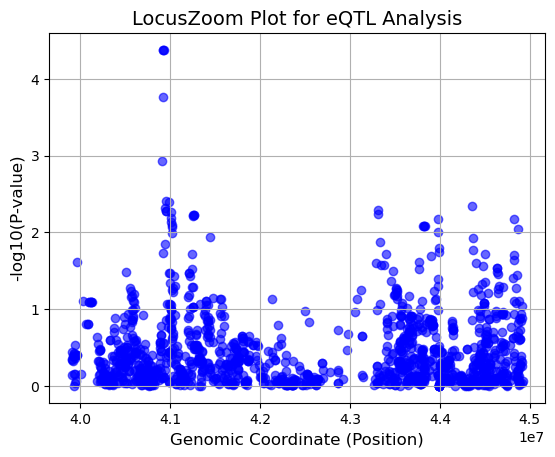

In [23]:
import matplotlib.pyplot as plt
plt.scatter(eqtl_apoe['position'], eqtl_apoe['-log10(P-value)'], 
                c='blue', alpha=0.6)
plt.xlabel('Genomic Coordinate (Position)', fontsize=12)
plt.ylabel('-log10(P-value)', fontsize=12)
plt.title('LocusZoom Plot for eQTL Analysis', fontsize=14)
plt.grid(True)

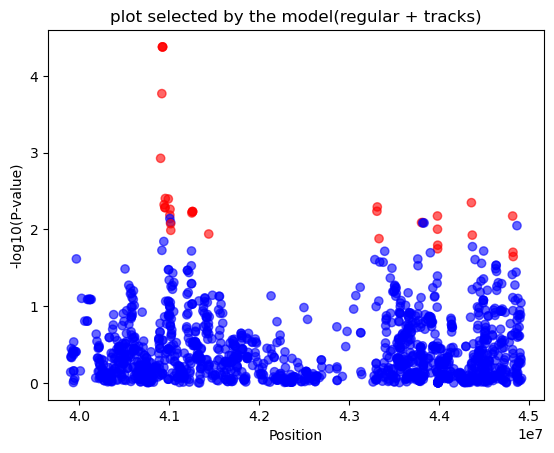

In [24]:
colors = ['blue'] * len(eqtl_apoe)

# Change color for the selected SNPs
colors = ['red' if snp in overlap_with_eqtl_top50 else 'blue' for snp in eqtl_apoe['SNP']]
plt.scatter(eqtl_apoe['position'], eqtl_apoe['-log10(P-value)'], 
            c=colors, alpha=0.6)

# Add labels and title
plt.xlabel('Position')
plt.ylabel('-log10(P-value)')
plt.title('plot selected by the model(regular + tracks)')

# Show the plot
plt.show()

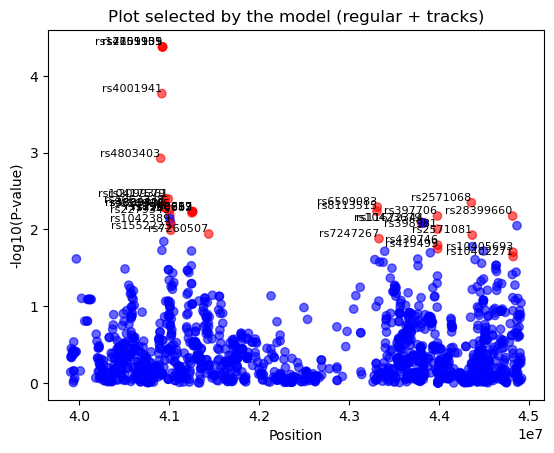

In [25]:
import matplotlib.pyplot as plt

# Assign colors
colors = ['red' if snp in overlap_with_eqtl_top50 else 'blue' for snp in eqtl_apoe['SNP']]

# Create scatter plot
plt.scatter(eqtl_apoe['position'], eqtl_apoe['-log10(P-value)'],
            c=colors, alpha=0.6)

# Add labels to red SNPs
for snp, x, y, color in zip(eqtl_apoe['SNP'], eqtl_apoe['position'], eqtl_apoe['-log10(P-value)'], colors):
    if color == 'red':  # Only label red SNPs
        plt.text(x, y, snp, fontsize=8, ha='right', va='bottom')

# Add labels and title
plt.xlabel('Position')
plt.ylabel('-log10(P-value)')
plt.title('Plot selected by the model (regular + tracks)')

# Show the plot
plt.show()

/tmp/ipykernel_2399358/1840296227.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


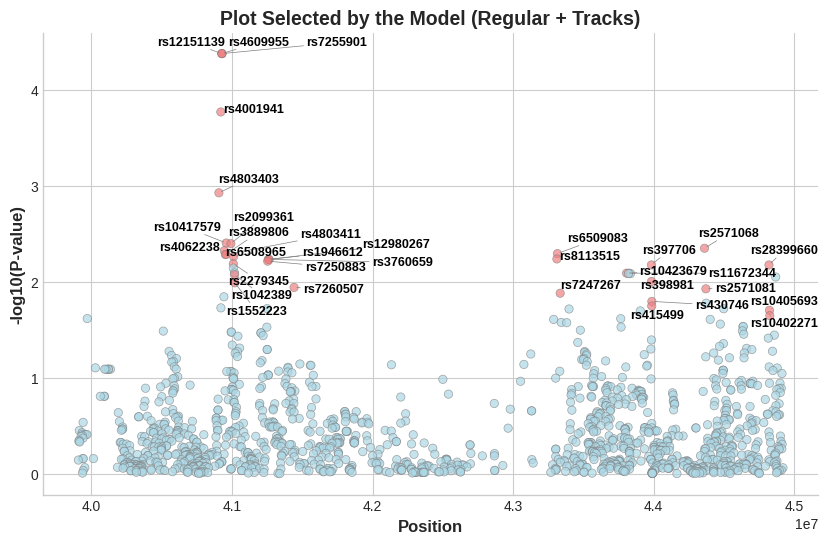

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# Use a modern style
plt.style.use('seaborn-whitegrid')

# Set figure size
plt.figure(figsize=(10, 6))

# Define color mapping with lighter shades
colors = ['lightcoral' if snp in overlap_with_eqtl_top50 else 'lightblue' for snp in eqtl_apoe['SNP']]

# Create scatter plot with lighter colors and edge colors for clarity
plt.scatter(eqtl_apoe['position'], eqtl_apoe['-log10(P-value)'],
            c=colors, alpha=0.7, edgecolors='gray', linewidth=0.5)

# Add labels for red SNPs with better spacing
texts = []
for snp, x, y, color in zip(eqtl_apoe['SNP'], eqtl_apoe['position'], eqtl_apoe['-log10(P-value)'], colors):
    if color == 'lightcoral':
        texts.append(plt.text(x, y, snp, fontsize=9, ha='left', va='bottom', fontweight='bold', color='black'))

# Adjust text to prevent overlapping
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Customize labels and title
plt.xlabel('Position', fontsize=12, fontweight='bold')
plt.ylabel('-log10(P-value)', fontsize=12, fontweight='bold')
plt.title('Plot Selected by the Model (Regular + Tracks)', fontsize=14, fontweight='bold')

# Remove unnecessary spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()

/tmp/ipykernel_2399358/3257153915.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


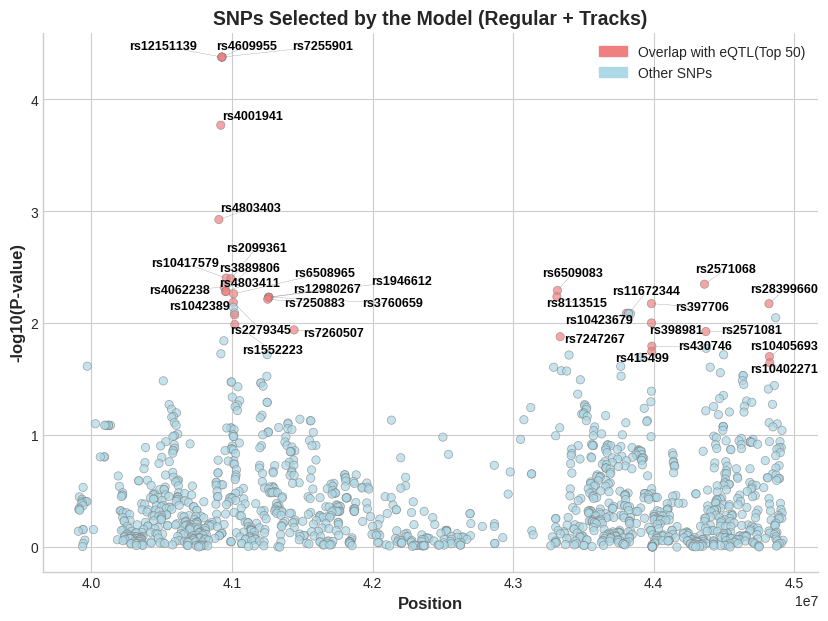

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from adjustText import adjust_text

plt.style.use('seaborn-whitegrid')

# Set figure size
plt.figure(figsize=(10, 7))

# Define color mapping with lighter shades
colors = ['lightcoral' if snp in overlap_with_eqtl_top50 else 'lightblue' for snp in eqtl_apoe['SNP']]

# Create scatter plot with lighter colors and edge colors for clarity
plt.scatter(eqtl_apoe['position'], eqtl_apoe['-log10(P-value)'],
            c=colors, alpha=0.7, edgecolors='gray', linewidth=0.5)

# Add labels for red SNPs with better spacing
texts = []
for snp, x, y, color in zip(eqtl_apoe['SNP'], eqtl_apoe['position'], eqtl_apoe['-log10(P-value)'], colors):
    if color == 'lightcoral':
        texts.append(plt.text(x, y, snp, fontsize=9, ha='left', va='bottom', fontweight='bold', color='black'))

# Adjust text to prevent overlapping
#adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))
adjust_text(texts, 
            expand_points=(1, 1), 
            force_text=(0.5, 0.5),
            arrowprops=dict(arrowstyle='-', color='gray', lw=0.2))

# Customize labels and title
plt.xlabel('Position', fontsize=12, fontweight='bold')
plt.ylabel('-log10(P-value)', fontsize=12, fontweight='bold')
plt.title('SNPs Selected by the Model (Regular + Tracks)', fontsize=14, fontweight='bold')

# Remove unnecessary spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add legend
legend_handles = [
    mpatches.Patch(color='lightcoral', label='Overlap with eQTL(Top 50)'),
    mpatches.Patch(color='lightblue', label='Other SNPs')
]
plt.legend(handles=legend_handles, loc='upper right', fontsize=10)

# Show the plot
plt.show()

In [28]:
top_50_regular = np.intersect1d(eqtl_apoe[:50]['SNP'], apoe_prediction_eqtl[:50]['SNP'])


In [29]:
top_50_tracks = np.intersect1d(eqtl_apoe[:50]['SNP'], apoe_prediction_tracks_eqtl[:50]['SNP'])


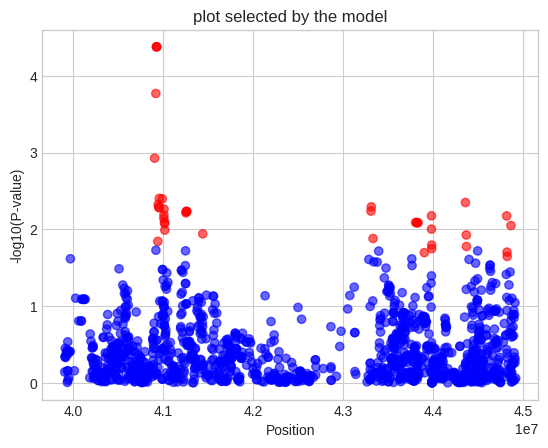

In [30]:
colors = ['blue'] * len(eqtl_apoe)

# Change color for the selected SNPs
colors = ['red' if snp in top_50_regular else 'blue' for snp in eqtl_apoe['SNP']]
plt.scatter(eqtl_apoe['position'], eqtl_apoe['-log10(P-value)'], 
            c=colors, alpha=0.6)

# Add labels and title
plt.xlabel('Position')
plt.ylabel('-log10(P-value)')
plt.title('plot selected by the model')

# Show the plot
plt.show()

/tmp/ipykernel_2399358/2478922092.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


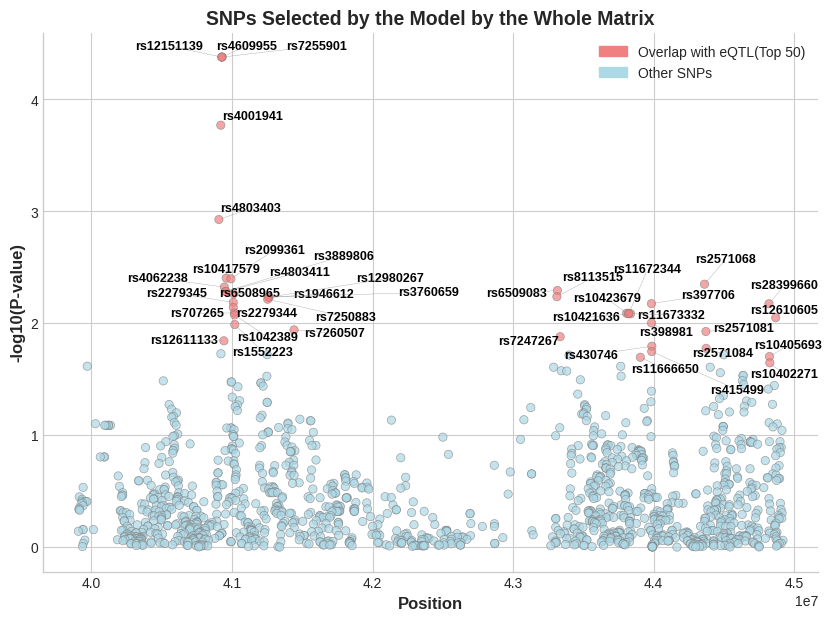

In [31]:


plt.style.use('seaborn-whitegrid')

# Set figure size
plt.figure(figsize=(10, 7))

# Define color mapping with lighter shades
colors = ['lightcoral' if snp in top_50_regular else 'lightblue' for snp in eqtl_apoe['SNP']]

# Create scatter plot with lighter colors and edge colors for clarity
plt.scatter(eqtl_apoe['position'], eqtl_apoe['-log10(P-value)'],
            c=colors, alpha=0.7, edgecolors='gray', linewidth=0.5)

# Add labels for red SNPs with better spacing
texts = []
for snp, x, y, color in zip(eqtl_apoe['SNP'], eqtl_apoe['position'], eqtl_apoe['-log10(P-value)'], colors):
    if color == 'lightcoral':
        texts.append(plt.text(x, y, snp, fontsize=9, ha='left', va='bottom', fontweight='bold', color='black'))

# Adjust text to prevent overlapping
#adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))
adjust_text(texts, 
            expand_points=(1, 1), 
            force_text=(0.5, 0.5),
            arrowprops=dict(arrowstyle='-', color='gray', lw=0.2))

# Customize labels and title
plt.xlabel('Position', fontsize=12, fontweight='bold')
plt.ylabel('-log10(P-value)', fontsize=12, fontweight='bold')
plt.title('SNPs Selected by the Model by the Whole Matrix', fontsize=14, fontweight='bold')

# Remove unnecessary spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add legend
legend_handles = [
    mpatches.Patch(color='lightcoral', label='Overlap with eQTL(Top 50)'),
    mpatches.Patch(color='lightblue', label='Other SNPs')
]
plt.legend(handles=legend_handles, loc='upper right', fontsize=10)

# Show the plot
plt.show()

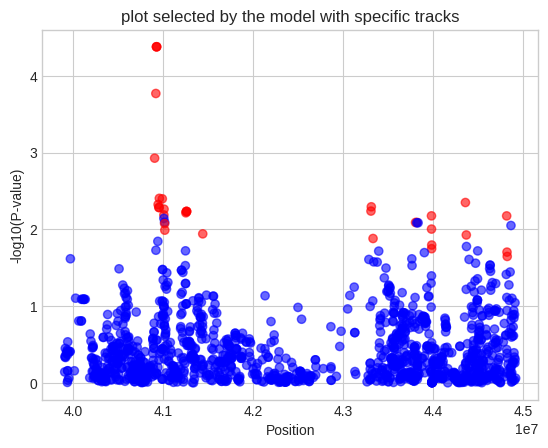

In [32]:
colors = ['blue'] * len(eqtl_apoe)

# Change color for the selected SNPs
colors = ['red' if snp in top_50_tracks else 'blue' for snp in eqtl_apoe['SNP']]
plt.scatter(eqtl_apoe['position'], eqtl_apoe['-log10(P-value)'], 
            c=colors, alpha=0.6)

# Add labels and title
plt.xlabel('Position')
plt.ylabel('-log10(P-value)')
plt.title('plot selected by the model with specific tracks')

# Show the plot
plt.show()

/tmp/ipykernel_2399358/3588075284.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


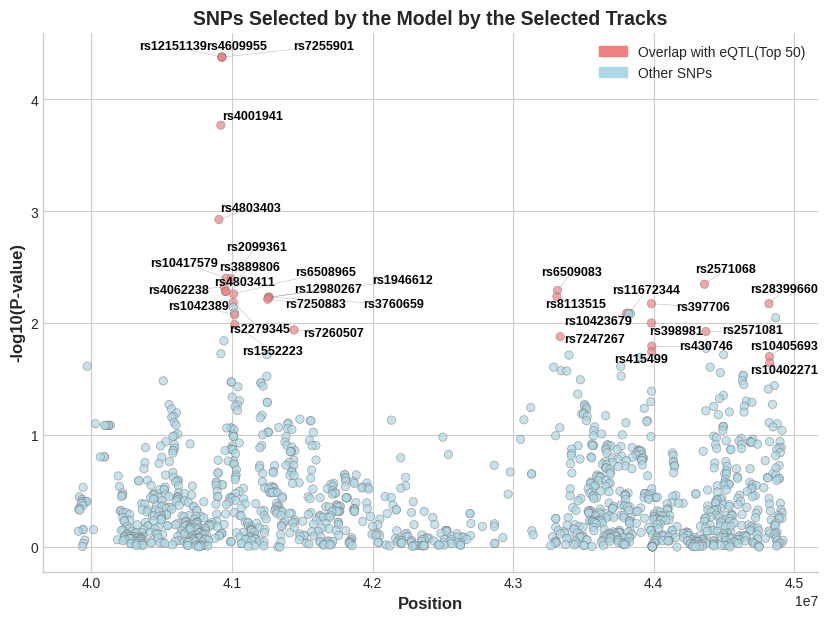

In [33]:


plt.style.use('seaborn-whitegrid')

# Set figure size
plt.figure(figsize=(10, 7))

# Define color mapping with lighter shades
colors = ['lightcoral' if snp in top_50_tracks else 'lightblue' for snp in eqtl_apoe['SNP']]

# Create scatter plot with lighter colors and edge colors for clarity
plt.scatter(eqtl_apoe['position'], eqtl_apoe['-log10(P-value)'],
            c=colors, alpha=0.7, edgecolors='gray', linewidth=0.5)

# Add labels for red SNPs with better spacing
texts = []
for snp, x, y, color in zip(eqtl_apoe['SNP'], eqtl_apoe['position'], eqtl_apoe['-log10(P-value)'], colors):
    if color == 'lightcoral':
        texts.append(plt.text(x, y, snp, fontsize=9, ha='left', va='bottom', fontweight='bold', color='black'))

# Adjust text to prevent overlapping
#adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))
adjust_text(texts, 
            expand_points=(1, 1), 
            force_text=(0.5, 0.5),
            arrowprops=dict(arrowstyle='-', color='gray', lw=0.2))

# Customize labels and title
plt.xlabel('Position', fontsize=12, fontweight='bold')
plt.ylabel('-log10(P-value)', fontsize=12, fontweight='bold')
plt.title('SNPs Selected by the Model by the Selected Tracks', fontsize=14, fontweight='bold')

# Remove unnecessary spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add legend
legend_handles = [
    mpatches.Patch(color='lightcoral', label='Overlap with eQTL(Top 50)'),
    mpatches.Patch(color='lightblue', label='Other SNPs')
]
plt.legend(handles=legend_handles, loc='upper right', fontsize=10)

# Show the plot
plt.show()

In [34]:
len(top_50_regular)

41

In [35]:
len(top_50_tracks)

33

In [36]:
len(overlap_with_eqtl_top50)

33

In [37]:
regular_and_tracks = np.intersect1d(apoe_prediction_eqtl[:50]['SNP'], apoe_prediction_tracks_eqtl[:50]['SNP'])

In [38]:
len(regular_and_tracks)

40

In [39]:
apoe_prediction_eqtl['chr'] = '19'
apoe_prediction_eqtl = apoe_prediction_eqtl.sort_values('Position')
apoe_prediction_eqtl.to_csv('/projects/ps-renlab2/sux002/DSC180/local_testing/result/apoe_eqtl_with_snp', sep='\t', index=False)

In [40]:
top_50_eqtl = apoe_prediction_eqtl.sort_values('-log10(P-value)', ascending=False)['SNP'][:50]

In [41]:
top_50_eqtl = np.array(top_50_eqtl)

/tmp/ipykernel_2399358/2252227608.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


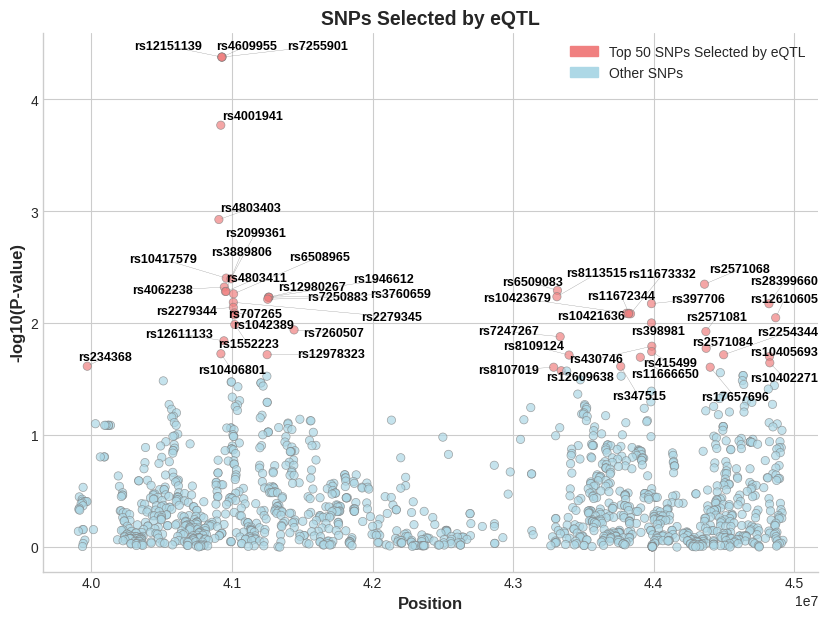

In [42]:


plt.style.use('seaborn-whitegrid')

# Set figure size
plt.figure(figsize=(10, 7))

# Define color mapping with lighter shades
colors = ['lightcoral' if snp in top_50_eqtl else 'lightblue' for snp in eqtl_apoe['SNP']]

# Create scatter plot with lighter colors and edge colors for clarity
plt.scatter(eqtl_apoe['position'], eqtl_apoe['-log10(P-value)'],
            c=colors, alpha=0.7, edgecolors='gray', linewidth=0.5)

# Add labels for red SNPs with better spacing
texts = []
for snp, x, y, color in zip(eqtl_apoe['SNP'], eqtl_apoe['position'], eqtl_apoe['-log10(P-value)'], colors):
    if color == 'lightcoral':
        texts.append(plt.text(x, y, snp, fontsize=9, ha='left', va='bottom', fontweight='bold', color='black'))

# Adjust text to prevent overlapping
#adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))
adjust_text(texts, 
            expand_points=(1, 1), 
            force_text=(0.5, 0.5),
            arrowprops=dict(arrowstyle='-', color='gray', lw=0.2))

# Customize labels and title
plt.xlabel('Position', fontsize=12, fontweight='bold')
plt.ylabel('-log10(P-value)', fontsize=12, fontweight='bold')
plt.title('SNPs Selected by eQTL', fontsize=14, fontweight='bold')

# Remove unnecessary spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add legend
legend_handles = [
    mpatches.Patch(color='lightcoral', label='Top 50 SNPs Selected by eQTL'),
    mpatches.Patch(color='lightblue', label='Other SNPs')
]
plt.legend(handles=legend_handles, loc='upper right', fontsize=10)

# Show the plot
plt.show()

/tmp/ipykernel_2399358/2206567324.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


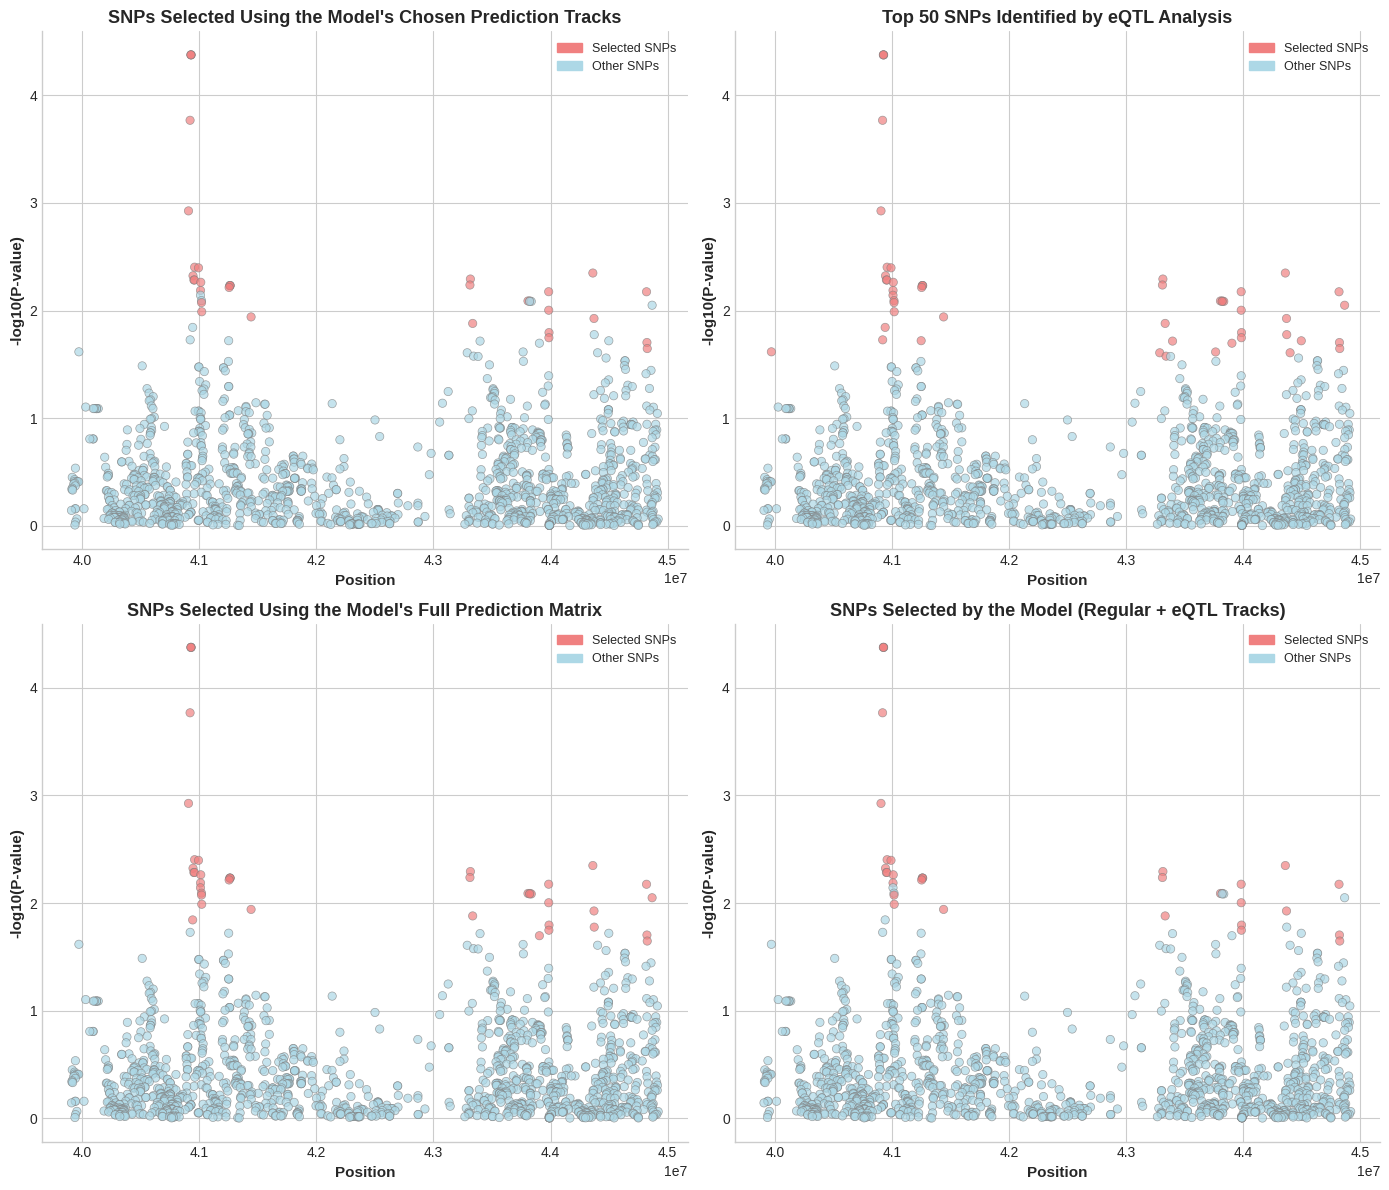

In [46]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from adjustText import adjust_text

plt.style.use('seaborn-whitegrid')

# Create figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # 2x2 grid

# Define datasets for each plot
datasets = [
    (top_50_tracks, "SNPs Selected Using the Model's Chosen Prediction Tracks"),
    (top_50_eqtl, "Top 50 SNPs Identified by eQTL Analysis"),
    (top_50_regular, "SNPs Selected Using the Model's Full Prediction Matrix"),
    (overlap_with_eqtl_top50, "SNPs Selected by the Model (Regular + eQTL Tracks)")
]

# Loop through each subplot
for ax, (snp_set, title) in zip(axes.flatten(), datasets):
    # Define color mapping
    colors = ['lightcoral' if snp in snp_set else 'lightblue' for snp in eqtl_apoe['SNP']]
    
    # Create scatter plot
    ax.scatter(eqtl_apoe['position'], eqtl_apoe['-log10(P-value)'],
               c=colors, alpha=0.7, edgecolors='gray', linewidth=0.5)
    
    # Add labels for significant SNPs
    #texts = []
    #for snp, x, y, color in zip(eqtl_apoe['SNP'], eqtl_apoe['position'], eqtl_apoe['-log10(P-value)'], colors):
    #    if color == 'lightcoral':
    #        texts.append(ax.text(x, y, snp, fontsize=8, ha='left', va='bottom', fontweight='bold', color='black'))

    # Adjust text to prevent overlapping
    #adjust_text(texts, 
    #            expand_points=(1, 1), 
    #            force_text=(0.5, 0.5),
    #            arrowprops=dict(arrowstyle='-', color='gray', lw=0.2), 
    #            ax=ax)

    # Customize labels and title
    ax.set_xlabel('Position', fontsize=11, fontweight='bold')
    ax.set_ylabel('-log10(P-value)', fontsize=11, fontweight='bold')
    ax.set_title(title, fontsize=13, fontweight='bold')

    # Remove unnecessary spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Add legend
    legend_handles = [
        mpatches.Patch(color='lightcoral', label='Selected SNPs'),
        mpatches.Patch(color='lightblue', label='Other SNPs')
    ]
    ax.legend(handles=legend_handles, loc='upper right', fontsize=9)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show all plots together
plt.show()